In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv
/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv


In [2]:
#Read IPL data
IPL_match = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')
IPL_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# **Who won most man of the match ?**



In [3]:
#getting count of MOM awards for each player
IPL_match.player_of_match.value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

In [4]:
#top 5 players who won most MOM awards

Top5_MOM = IPL_match.player_of_match.value_counts()[0:5]
Top5_MOM

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64

**Lets Plot Top5 MOM award winners**

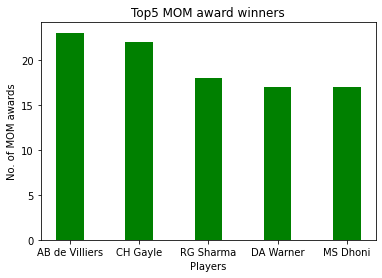

In [5]:
import matplotlib.pyplot as plt

plt.bar(Top5_MOM.keys(), Top5_MOM, color ='green',width = 0.4)
plt.xlabel("Players")
plt.ylabel("No. of MOM awards")
plt.title("Top5 MOM award winners")
plt.show()

# Which City had the most number of matches hosted ?

In [6]:
#getting count of number of matches played in each cities
IPL_match.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Port Elizabeth      7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [7]:
Top5_cities = IPL_match.city.value_counts()[0:5]
Top5_cities

Mumbai       101
Kolkata       77
Delhi         74
Bangalore     65
Hyderabad     64
Name: city, dtype: int64

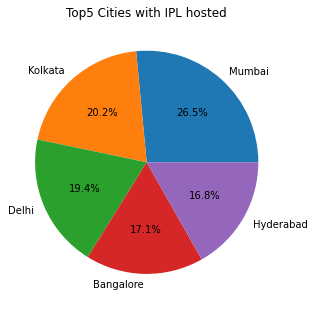

In [8]:
#Lets plot in on pie
plt.figure(figsize=(5,8))
plt.pie(Top5_cities, labels=Top5_cities.keys(),autopct='%0.1f%%')
plt.title("Top5 Cities with IPL hosted")
plt.show()

# Which Team won most number of matches?

In [9]:
Match_winners = IPL_match.winner.value_counts()

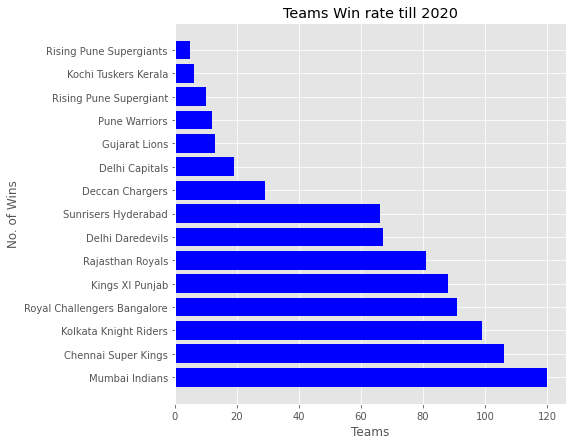

In [10]:
plt.figure(figsize=(7,7))
plt.style.use('ggplot')
plt.barh(Match_winners.keys(), Match_winners, color ='Blue')
plt.xlabel("Teams")
plt.ylabel("No. of Wins")
plt.title("Teams Win rate till 2020")
plt.show()

# Who won most toss ?

In [11]:
IPL_match.toss_winner.value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

# In Which Season was most matches played?

In [12]:
#lets get the year from date

IPL_match['Year'] = pd.DatetimeIndex(IPL_match['date']).year

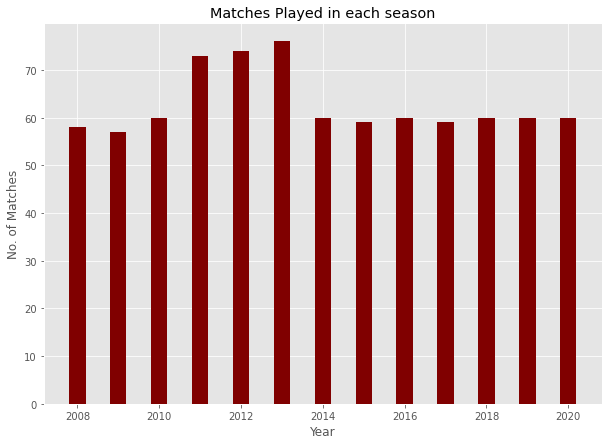

In [13]:
plt.figure(figsize=(10,7))
plt.bar(IPL_match.Year.value_counts().keys(), IPL_match.Year.value_counts(), color ='maroon',width = 0.4)
plt.xlabel("Year")
plt.ylabel("No. of Matches")
plt.title("Matches Played in each season")
plt.show()

# What is the % of matches won by Batting first and Batting second ?

In [14]:
#lets get data of matches won by batting first

won_by_runs = IPL_match[IPL_match['result'] == 'runs']

In [15]:
won_by_runs.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,2008
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba,2008
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,2008


In [16]:
won_by_runs.shape

(364, 18)

In [17]:
#lets get data of matches won by Chasing

won_by_wickets = IPL_match[IPL_match['result'] == 'wickets']

In [18]:
won_by_wickets.shape

(435, 18)

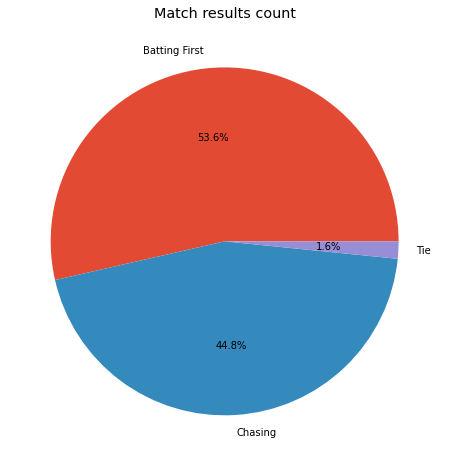

In [19]:
match_results = IPL_match['result'].value_counts()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(match_results, labels=['Batting First','Chasing','Tie'],autopct='%0.1f%%')
plt.title("Match results count")
plt.show()

array([[<AxesSubplot:title={'center':'result_margin'}>]], dtype=object)

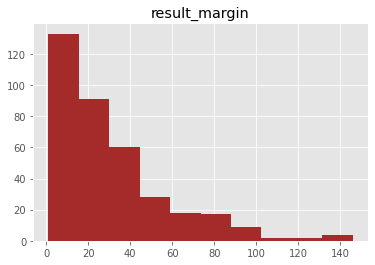

In [20]:
won_by_runs.hist(column='result_margin', color='brown')

**So we can infer from above histogram that most matches won by a margin of 0 to 20 runs by defending, and defending above 100 runs happened very few times.**

In [21]:
won_by_runs[won_by_runs['result_margin'] >= 100]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
55,336038,Mumbai,2008-05-30,SR Watson,Wankhede Stadium,0,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,field,Rajasthan Royals,runs,105.0,N,NaN,BF Bowden,RE Koertzen,2008
236,501260,Dharamsala,2011-05-17,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,0,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,Kings XI Punjab,runs,111.0,N,NaN,Asad Rauf,AM Saheba,2011
351,598027,Bangalore,2013-04-23,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,Royal Challengers Bangalore,runs,130.0,N,NaN,Aleem Dar,C Shamshuddin,2013
497,829785,Bangalore,2015-05-06,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Royal Challengers Bangalore,runs,138.0,N,NaN,RK Illingworth,VA Kulkarni,2015
560,980987,Bangalore,2016-05-14,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,Royal Challengers Bangalore,runs,144.0,N,NaN,AY Dandekar,VK Sharma,2016
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017
676,1136601,Kolkata,2018-05-09,Ishan Kishan,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,field,Mumbai Indians,runs,102.0,N,NaN,KN Ananthapadmanabhan,AK Chaudhary,2018
706,1175366,Hyderabad,2019-03-31,JM Bairstow,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,118.0,N,NaN,KN Ananthapadmanabhan,S Ravi,2019


> These are the matches that was defended with a margin > 100 runs

array([[<AxesSubplot:title={'center':'result_margin'}>]], dtype=object)

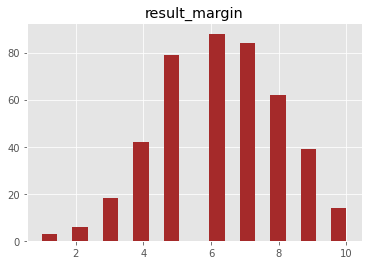

In [22]:
won_by_wickets.hist(column='result_margin', color='brown', bins = 20)

****Above histogram depicts that more than 80 matches were won with 6 wickets in hand, followed by 7 and 5 wickets deposit.
Very Few matches were won with less than 2 wickets in hand and delivering a thriller finish.****

> Lets look at those nail biting matches details ...

In [23]:
won_by_wickets[won_by_wickets['result_margin'] <= 2]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Year
99,392224,Durban,2009-05-14,LRPL Taylor,Kingsmead,1,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Royal Challengers Bangalore,wickets,2.0,N,NaN,BR Doctrove,DJ Harper,2009
295,548355,Mumbai,2012-05-06,DR Smith,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,2.0,N,NaN,Asad Rauf,S Asnani,2012
500,829791,Kolkata,2015-05-09,AD Russell,Eden Gardens,0,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,bat,Kolkata Knight Riders,wickets,1.0,N,NaN,AK Chaudhary,HDPK Dharmasena,2015
536,980939,Pune,2016-04-24,SA Yadav,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiants,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,2.0,N,NaN,CB Gaffaney,A Nand Kishore,2016
625,1082640,Kanpur,2017-05-10,SS Iyer,Green Park,0,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,Delhi Daredevils,wickets,2.0,N,NaN,YC Barde,AK Chaudhary,2017
636,1136561,Mumbai,2018-04-07,DJ Bravo,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore,2018
642,1136567,Hyderabad,2018-04-12,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,1.0,N,NaN,NJ Llong,CK Nandan,2018
692,1136617,Mumbai,2018-05-22,F du Plessis,Wankhede Stadium,0,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,2.0,N,NaN,C Shamshuddin,M Erasmus,2018
753,1181766,Visakhapatnam,2019-05-08,RR Pant,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,field,Delhi Capitals,wickets,2.0,N,NaN,BNJ Oxenford,S Ravi,2019


# Lets analyze a Match in detail now ...!

In [24]:
ball_by_ball_details = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')

In [25]:
ball_by_ball_details.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [26]:
ball_by_ball_details.shape

(193468, 18)

**So if we want to analyse any particular match we have to do it by using the 'id' column reference.**

***Lets analyze MI vs CSK match played on 2018-04-07, which was a last over thriller!!***

In [27]:
#I noted down the match id i.e 1136561

MIvsCSK_df = ball_by_ball_details[ball_by_ball_details.id == 1136561]

In [28]:
MIvsCSK_df.shape

(246, 18)

> **There are total 246 rows, which implies that 6 extra deliveries had been bowled in this match. (In a t20 match there will be 240 legal deliveries)**

In [29]:
MIvsCSK_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
150379,1136561,1,7,2,Ishan Kishan,SA Yadav,RA Jadeja,4,0,4,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings
150380,1136561,1,7,3,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings
150381,1136561,1,7,4,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings
150382,1136561,1,7,5,Ishan Kishan,SA Yadav,RA Jadeja,4,0,4,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings
150383,1136561,1,7,6,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings


In [30]:
#lets seperate out innings data

MI_df = MIvsCSK_df[MIvsCSK_df['batting_team'] == 'Mumbai Indians']
CSK_df = MIvsCSK_df[MIvsCSK_df['batting_team'] == 'Chennai Super Kings']

In [31]:
MI_df.dismissal_kind.value_counts()

caught    3
lbw       1
Name: dismissal_kind, dtype: int64

> So MI lost only 4 wickets.

In [32]:
CSK_df.dismissal_kind.value_counts()

caught     6
lbw        2
stumped    1
Name: dismissal_kind, dtype: int64

> CSK had lost 9 wickets.

# What is the target set by MI ?

In [33]:
MI_df.total_runs.sum()

165

> 166 is the target for CSK.

In [34]:
CSK_df.total_runs.sum()

169

> CSK scored 169 and won the match!

# What is the scorecard of both teams?

> **MI Scorecard**

In [35]:
MI_df.groupby('batsman')['batsman_runs'].sum()

batsman
E Lewis          0
HH Pandya       22
Ishan Kishan    40
KH Pandya       41
RG Sharma       15
SA Yadav        43
Name: batsman_runs, dtype: int64

> **CSK Scorecard**

In [36]:
CSK_df.groupby('batsman')['batsman_runs'].sum()

batsman
AT Rayudu          22
DJ Bravo           68
DL Chahar           0
Harbhajan Singh     8
Imran Tahir         2
KM Jadhav          24
MA Wood             1
MS Dhoni            5
RA Jadeja          12
SK Raina            4
SR Watson          16
Name: batsman_runs, dtype: int64

> **Bowling Stats**

In [37]:
print("CSK Bowling figures")
print("------------------")
MI_df.groupby('bowler')['is_wicket'].sum()

CSK Bowling figures
------------------


bowler
DJ Bravo           0
DL Chahar          1
Harbhajan Singh    0
Imran Tahir        1
MA Wood            0
RA Jadeja          0
SR Watson          2
Name: is_wicket, dtype: int64

In [38]:
print("MI Bowling figures")
print("------------------")
CSK_df.groupby('bowler')['is_wicket'].sum()

MI Bowling figures
------------------


bowler
HH Pandya            3
JJ Bumrah            1
M Markande           3
MJ McClenaghan       1
Mustafizur Rahman    1
Name: is_wicket, dtype: int64